# Multi variable comparison
Assessing both wave height and wind speed at the same time

In [1]:
from fmskill import ModelResult, PointObservation, TrackObservation, Connector

## Define observations
Below, the observations will take the default variable names from the eum type of the item. Alternatively, the user can give another variable name by providing the `variable_name` argument.

In [2]:
# wave height
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA_Hm0")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL_Hm0")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2_Hm0")

# wind speed
wind1 = PointObservation('../tests/testdata/SW/HKNA_wind.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA_wind")
wind2 = PointObservation('../tests/testdata/SW/F16_wind.dfs0', item=0, x=4.01222, y=54.1167, name="F16_wind")
wind3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=2, name="c2_wind")

In [3]:
o1.variable_name

'Significant_wave_height'

## Define model results
Two different simulation runs are used to create four model results:

In [4]:
fn1 = "../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu"
mr1Hm0 = ModelResult(fn1, name='SW_1', item='Sign. Wave Height')
mr1WS = ModelResult(fn1, name='SW_1', item='Wind speed')
fn2 = "../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu"
mr2Hm0 = ModelResult(fn2, name='SW_2', item='Sign. Wave Height')
mr2WS = ModelResult(fn2, name='SW_2', item='Wind speed')

In [5]:
mr1WS

<DfsModelResultItem> 'SW_1'
File: ../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu
- Item: 13: Wind speed <Wind speed> (meter per sec)

## Connect model and observations and extract
We connect the observation item and model item by refering to the item name in the ModelResult. Item number can also be used.

In [6]:
con = Connector()
con.add([o1, o2, o3], [mr1Hm0, mr2Hm0])
con.add([wind1, wind2, wind3], [mr1WS, mr2WS])
con

<Connector> with 
 -<PointConnector> obs=HKNA_Hm0(n=564) :: 2 models=[SW_1, SW_2]
 -<PointConnector> obs=EPL_Hm0(n=95) :: 2 models=[SW_1, SW_2]
 -<TrackConnector> obs=c2_Hm0(n=298) :: 2 models=[SW_1, SW_2]
 -<PointConnector> obs=HKNA_wind(n=1484) :: 2 models=[SW_1, SW_2]
 -<PointConnector> obs=F16_wind(n=312) :: 2 models=[SW_1, SW_2]
 -<TrackConnector> obs=c2_wind(n=298) :: 2 models=[SW_1, SW_2]

In [7]:
cc = con.extract()

In [8]:
cc.n_variables

2

In [9]:
cc.var_names

['Significant_wave_height', 'Wind_speed']

## Analysis
Now that the result has been extracted, we can do analysis. Multiple variables means an extra level in the multi-index of the skill dataframe. 

In [10]:
s = cc.skill()
s.round(3)

n   bias   rmse  urmse    mae  \
model observation variable                                                   
SW_1  EPL_Hm0     Significant_wave_height   67 -0.067  0.224  0.213  0.189   
      F16_wind    Wind_speed                67  2.102  2.775  1.812  2.197   
      HKNA_Hm0    Significant_wave_height  386 -0.194  0.352  0.293  0.252   
      HKNA_wind   Wind_speed               277 -0.881  1.276  0.923  1.023   
      c2_Hm0      Significant_wave_height  113 -0.001  0.352  0.352  0.295   
      c2_wind     Wind_speed               113  0.409  0.638  0.490  0.506   
SW_2  EPL_Hm0     Significant_wave_height   67 -0.000  0.232  0.232  0.198   
      F16_wind    Wind_speed                67  2.102  2.775  1.812  2.197   
      HKNA_Hm0    Significant_wave_height  386 -0.100  0.293  0.275  0.214   
      HKNA_wind   Wind_speed               277 -0.881  1.276  0.923  1.023   
      c2_Hm0      Significant_wave_height  113  0.081  0.430  0.422  0.357   
      c2_wind     Wind_speed               113  0.409  0.638  0.490  0.506   

                                              cc     si     r2  
model observation variable                                      
SW_1  EPL_Hm0     Significant_wave_height  0.970  0.083  0.933  
      F16_wind    Wind_speed               0.825  0.141  0.230  
      HKNA_Hm0    Significant_wave_height  0.971  0.094  0.905  
      HKNA_wind   Wind_speed               0.963  0.066  0.861  
      c2_Hm0      Significant_wave_height  0.974  0.128  0.900  
      c2_wind     Wind_speed               0.960  0.051  0.867  
SW_2  EPL_Hm0     Significant_wave_height  0.970  0.090  0.927  
      F16_wind    Wind_speed               0.825  0.141  0.230  
      HKNA_Hm0    Significant_wave_height  0.971  0.089  0.934  
      HKNA_wind   Wind_speed               0.963  0.066  0.861  
      c2_Hm0      Significant_wave_height  0.974  0.153  0.850  
      c2_wind     Wind_speed               0.960  0.051  0.867

In [11]:
s.index.names

FrozenList(['model', 'observation', 'variable'])

In [12]:
s = cc.skill(variable='Significant_wave_height')
s.style()

In [13]:
s.sel(observation='c2_Hm0').style(columns='rmse')

,observation,variable,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,,
SW_1,c2_Hm0,Significant_wave_height,113,-0.001,0.352,0.352,0.295,0.974,0.128,0.900
SW_2,c2_Hm0,Significant_wave_height,113,0.081,0.430,0.422,0.357,0.974,0.153,0.850


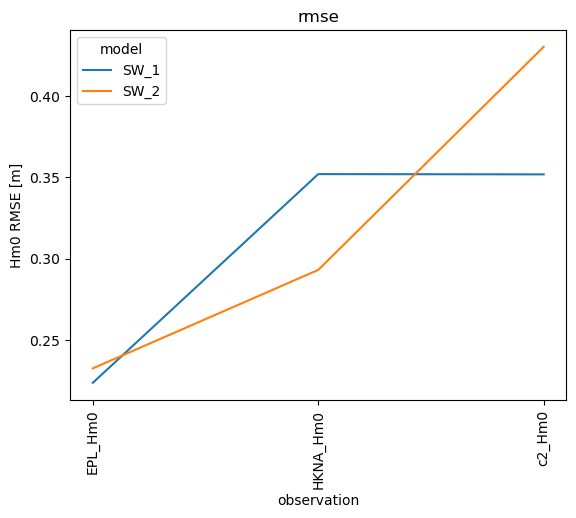

In [14]:
s.plot_line('rmse', ylabel='Hm0 RMSE [m]');

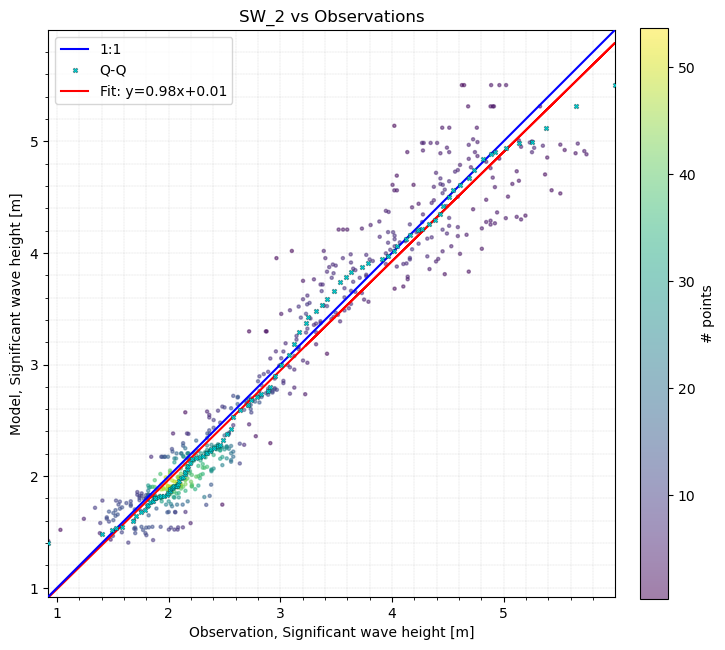

In [15]:
cc.scatter(model=1);

## mean skill
The `mean_skill()` method will return a weighted average of the skill score per model and variable. You can get the "normal" mean_skill (per model) by selecting a specific variable either by id or name.

In [16]:
s = cc.mean_skill()
s

n      bias      rmse     urmse       mae  \
model variable                                                               
SW_1  Significant_wave_height  566 -0.087356  0.309119  0.286247  0.244979   
      Wind_speed               457  0.543226  1.563076  1.075053  1.241847   
SW_2  Significant_wave_height  566 -0.006398  0.318593  0.310086  0.256618   
      Wind_speed               457  0.543226  1.563076  1.075053  1.241847   

                                     cc        si        r2  
model variable                                               
SW_1  Significant_wave_height  0.971791  0.101595  0.912468  
      Wind_speed               0.915916  0.086039  0.652388  
SW_2  Significant_wave_height  0.971791  0.110653  0.903722  
      Wind_speed               0.915916  0.086039  0.652388

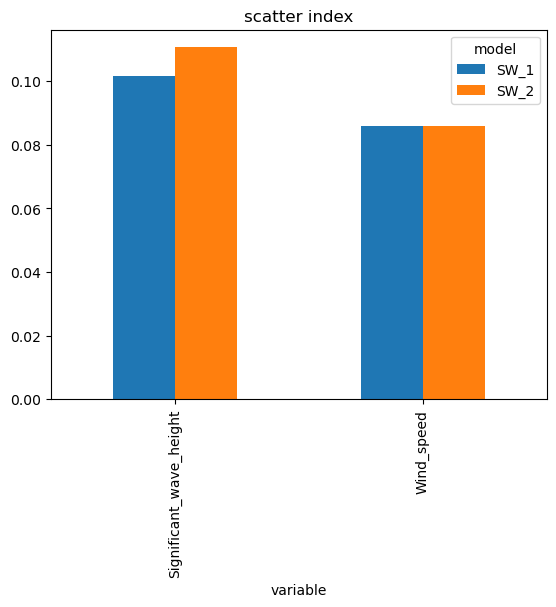

In [17]:
s.plot_bar('si', title='scatter index');

In [18]:
cc.mean_skill(model='SW_2')

,model,n,bias,rmse,urmse,mae,cc,si,r2
variable,,,,,,,,,
Significant_wave_height,SW_2,566,-0.006398,0.318593,0.310086,0.256618,0.971791,0.110653,0.903722
Wind_speed,SW_2,457,0.543226,1.563076,1.075053,1.241847,0.915916,0.086039,0.652388


In [19]:
cc.mean_skill(variable='Significant_wave_height').style(columns=[])

,variable,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,Significant_wave_height,566,-0.087,0.309,0.286,0.245,0.972,0.102,0.912
SW_2,Significant_wave_height,566,-0.006,0.319,0.310,0.257,0.972,0.111,0.904


## score

In [20]:
cc.score()

{'SW_1': 0.9360973333549103, 'SW_2': 0.9408344021305475}

In [21]:
cc.score(model='SW_1')

0.9360973333549103

In [22]:
cc.score(variable='Wind_speed')

{'SW_1': 1.5630757237072406, 'SW_2': 1.5630757237072406}